Removing artefacts using a median filter
========================================

Sometimes, time-series data is filled with bad measures that really stand out from other data. If such data are impossible to remove at the source and there are not too many of those, then the median filter is a simple way to filter such artefacts. In this tutorial, we will see how to apply a median filter on TimeSeries data, using the [filters.median()](../api/kineticstoolkit.filters.rst#kineticstoolkit.filters.median) function.

In [1]:
import kineticstoolkit.lab as ktk
import matplotlib.pyplot as plt

We will first load some noisy data:

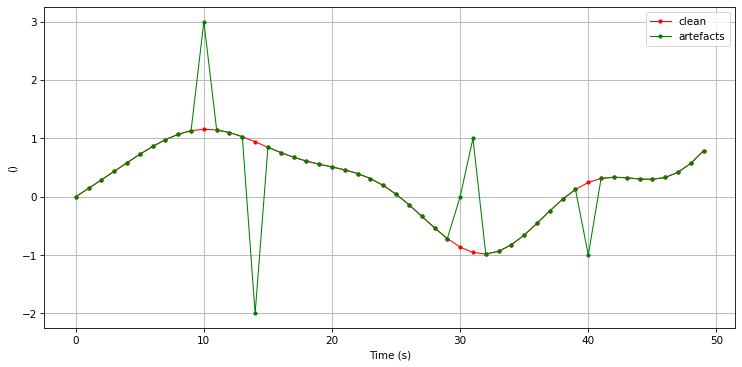

In [2]:
ts = ktk.load(
    ktk.config.root_folder + '/data/filters/sample_noises.ktk.zip')

# Plot it
ts.plot(['clean', 'artefacts'], marker='.')
plt.grid(True)
plt.tight_layout()

We clearly see the bad values here. We can remove most of those by applying a median filter with a window length of 3, which will give, for each point, the average of the two points that are the closest together.

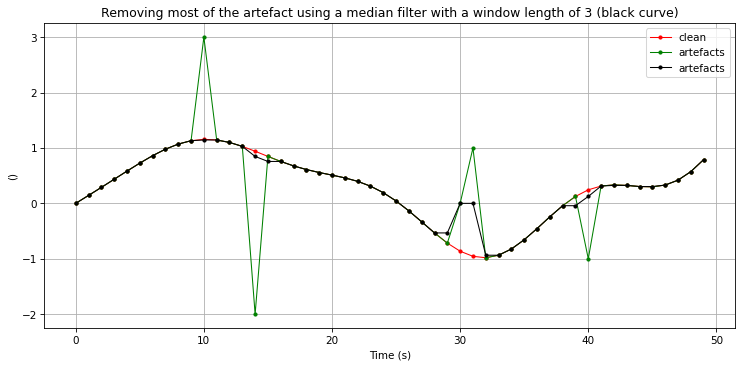

In [3]:
filtered = ktk.filters.median(ts, window_length=3)

ts.plot(['clean', 'artefacts'], marker='.')

filtered.plot('artefacts', marker='.', color='k')

plt.title('Removing most of the artefact using a median filter with a window length of 3 (black curve)')
plt.grid(True)
plt.tight_layout()

Most artefacts were removed, but not the ones at 30 and 31 seconds. This is because there are two consecutive artefacts, and as such the median filter considers that at these times, the clean signal is the artefact. A more agressive filter with a larger window length could be used, at the expense of more signal loss.

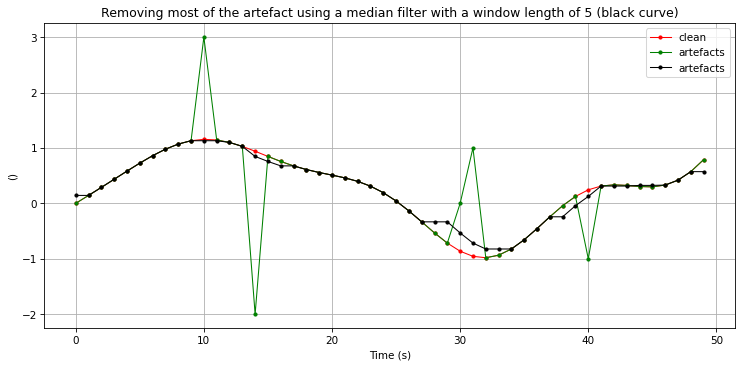

In [4]:
filtered = ktk.filters.median(ts, window_length=5)

ts.plot(['clean', 'artefacts'], marker='.')

filtered.plot('artefacts', marker='.', color='k')

plt.title('Removing most of the artefact using a median filter with a window length of 5 (black curve)')
plt.grid(True)
plt.tight_layout()